# Warehouse demand prediction to optimize Inventory :

In [45]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt 

In [46]:
# Load data 
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data[['Feature', 'Target']].values



In [47]:
# Initialize centroids randomly
def initialize_centroids(data, k):
    random_indices = random.sample(range(len(data)), k)
    return data[random_indices]


In [48]:
# Calculate Euclidean distance
def calculate_distance(pointA, pointB):
    return np.sqrt(np.sum((pointA - pointB) ** 2))



In [49]:
# Assign clusters based on nearest centroid
def assign_clusters(data, centroids):
    assignments = []
    for point in data:
        distances = [calculate_distance(point, centroid) for centroid in centroids]
        assignments.append(np.argmin(distances)) 
    return assignments



In [50]:
# Update centroids based on assigned clusters
def update_centroids(data, assignments, k):
    new_centroids = np.zeros((k, data.shape[1]))
    counts = np.zeros(k)
    
    for i in range(len(data)):
        cluster_id = assignments[i]
        new_centroids[cluster_id] += data[i]
        counts[cluster_id] += 1
    
    # Average to get new centroids
    for i in range(k):
        if counts[i] > 0:
            new_centroids[i] /= counts[i]
    
    return new_centroids
    


In [51]:
# K-means clustering algorithm
def k_means_clustering(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    
    for _ in range(max_iterations):
        assignments = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, assignments, k)

        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, assignments


In [52]:
# Visualization function
def visualize_clusters(data, centroids, assignments):
    plt.figure(figsize=(10, 6))
    
    # Scatter plot of the data points colored by cluster assignment
    plt.scatter(data[:, 0], data[:, 1], c=assignments, cmap='viridis', marker='o', edgecolor='k', s=50)
    
    # Plot the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    
    plt.title('K-means Clustering')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.legend()
    plt.grid()
    plt.show()

the Final identified Centroids are :

Centroid: [ 7.59987653 29.69100798]


Centroid: [ 1.08046609 10.32135642]


Centroid: [ 5.34435362 22.35409454]


Centroid: [ 2.99904786 16.27139387]


Centroid: [ 9.22546322 35.31071033]




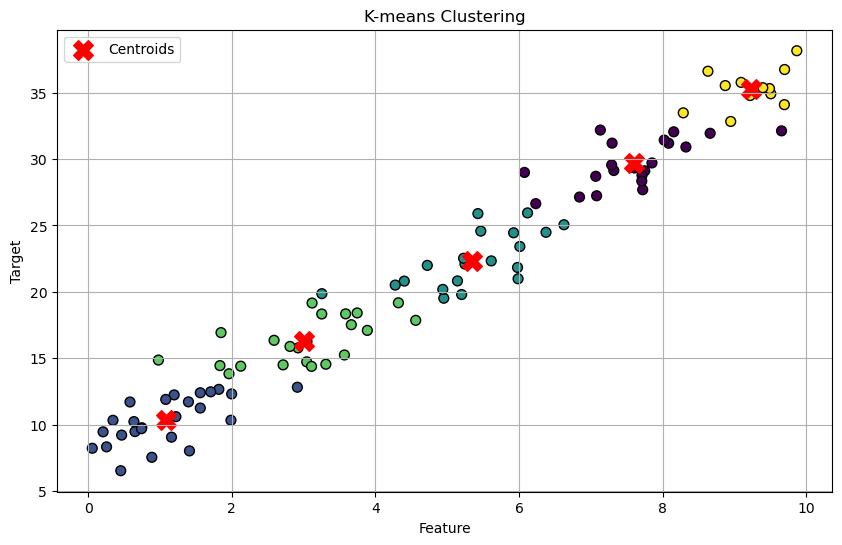

In [53]:
# Main function to run clustering
if __name__ == "__main__":
    file_path = 'warehouse_demand_data.csv' 
    data = load_data(file_path)

    k = 5  
    final_centroids, cluster_assignments = k_means_clustering(data, k)

    print("the Final identified Centroids are :\n")
    for centroid in final_centroids:
        print(f"Centroid: {centroid}")
        print("\n")
    visualize_clusters(data, final_centroids, cluster_assignments)